<h1>3. How to derive basic insights from data?</h1>
<br>
We often work with an Excel-like data file, for which Pandas is an appropriate data library. Pandas plotting is built on top of Matplotlib but is a higher-level plotting API (with shorter and more convenient code). 


<p class="lead"> 
Table of Contents: 

- <a href="#Understanding-Pandas-and-loading-data">Understanding Pandas and loading data</a>
- <a href="#Pandas-plotting-API">Pandas plotting API</a>    
- <a href="#Pattern-of-a-continuous-variable">Pattern of a continuous variable</a>
- <a href="#Pattern-of-a-categorical-variable">Pattern of a categorical variable</a>
- <a href="#Relationship-between-two-variables">Relationship between two variables</a>
- <a href="#Time-series">Time series</a>
    
</p>





<div>
<h2 class="breadcrumb">Understanding Pandas and loading data</h2><p>
</div>

> Pandas DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. (pandas.pydata.org)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('assets/mpg.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'assets/mpg.csv'

In [7]:
df = pd.read_csv('mpg.csv')

In [8]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
len(df)

398

In [10]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


The column labels can be accessed using columns attributes:

In [11]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Use df.column_name or df['column_name'] to get a column:

In [12]:
df.weight

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

In [13]:
df['weight']

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

In [14]:
df.weight.mean()

2970.424623115578

In [15]:
df.weight.std()

846.8417741973271

In [16]:
df.origin.value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

<div class="alert alert-info">
<h4>Exercise</h4>

Try load in another dataset from 'assets/penguins.csv' and call it `dfe`.  
<details><summary><i><u>(Hint)</u><i></summary><br>
Use the `pd.read_csv` method. 
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')
```
</details>
</details>
</div>

<div class="alert alert-info">
<h4>Exercise</h4>

Explore the Penguins dataset.  
</div>

<div>
<h2 class="breadcrumb">Pandas plotting API</h2><p>
</div>

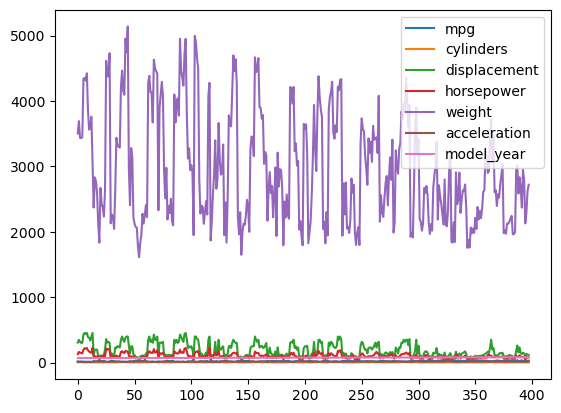

In [17]:
df.plot();

<div class="alert alert-success">
<h4>Tips</h4>

To understand how df.plot works, try `df.plot?`

In [18]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x00000202DB0D4A90>
File:           c:\programdata\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot


<div>
<h2 class="breadcrumb">Pattern of a continuous variable</h2><p>
</div>

In [ ]:
df.head()

### Histogram

> A `histogram` is a representation of the distribution of data.


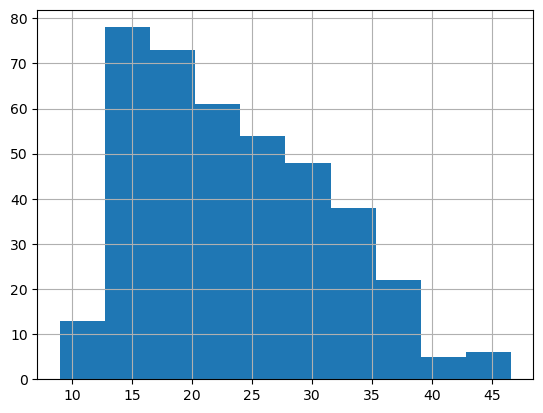

In [19]:
df['mpg'].hist(grid=True);

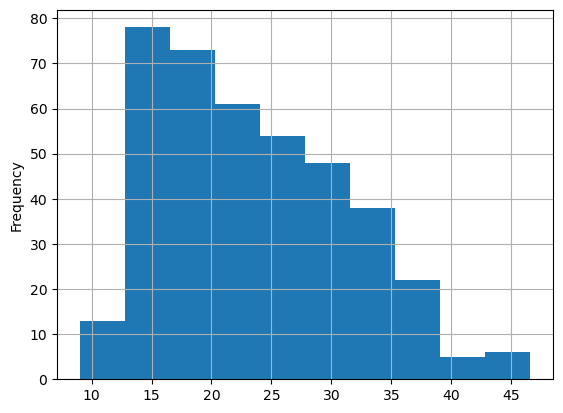

In [20]:
df['mpg'].plot(kind='hist', grid=True);

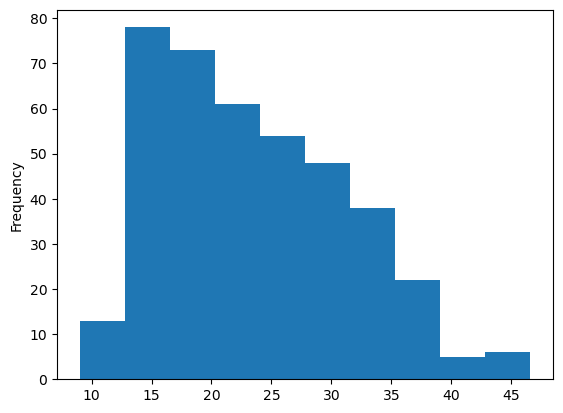

In [21]:
df['mpg'].plot(kind='hist');

Create histogram plots for two variables:

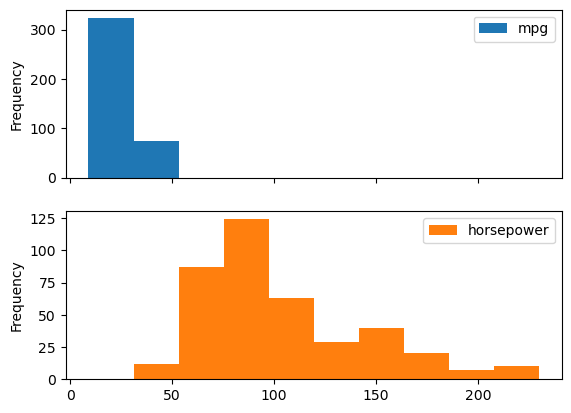

In [23]:
df[['mpg', 'horsepower']].plot(kind='hist', subplots=True);

What is the distribution of mpg by origin?

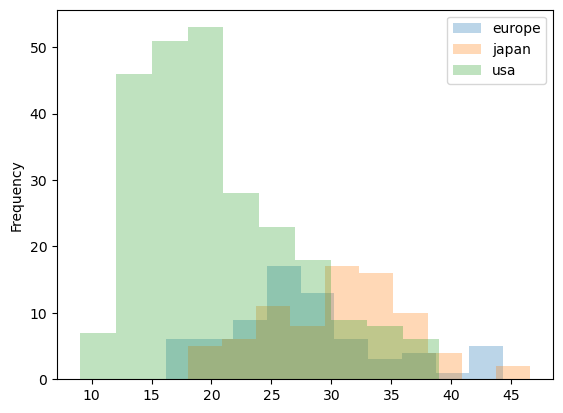

In [24]:
df.groupby('origin')['mpg'].plot(kind='hist', alpha=0.3, legend=True);

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Kernel Density Estimate plot

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.


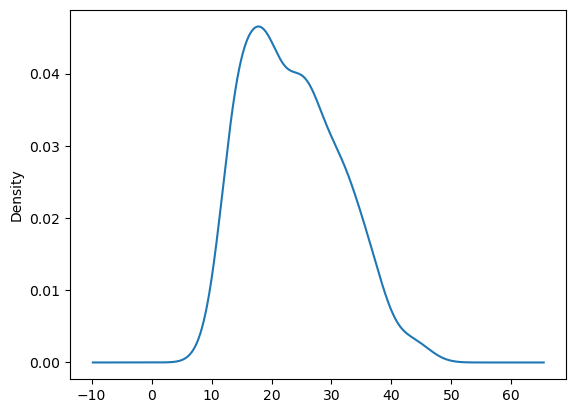

In [25]:
df['mpg'].plot(kind='kde');

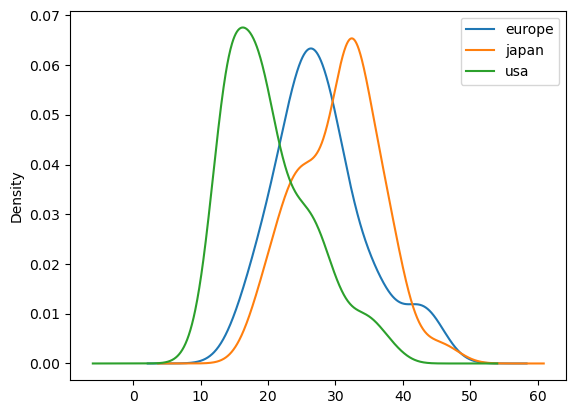

In [26]:
df.groupby('origin')['mpg'].plot(kind='kde', legend=True);

<div class="alert alert-info">
<h4>Exercise</h4>

In the previous exercise, you have loaded the Penguins dataset. In this exercise, explore the distribution of body mass of penguins and see how the distributions differ by species and sex. 
    
<details><summary><i><u>(Hint)</u><i></summary><br>
You can either use histogram or kernel density plot for this exercise, or both! 
    
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe['body_mass_g'].plot(kind='kde');
dfe.groupby('species')['body_mass_g'].plot(kind='kde', legend=True);
dfe.groupby('sex')['body_mass_g'].plot(kind='kde', legend=True);
dfe.groupby(['sex','species'])['body_mass_g'].plot(kind='kde', legend=True);

```
</details>
</details>
</div>

<div>
<h2 class="breadcrumb">Pattern of a categorical variable</h2><p>
</div>

### Bar chart

In [25]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [26]:
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

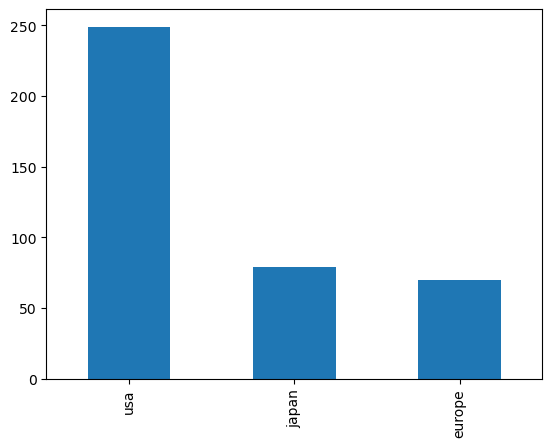

In [27]:
df['origin'].value_counts().plot(kind='bar');

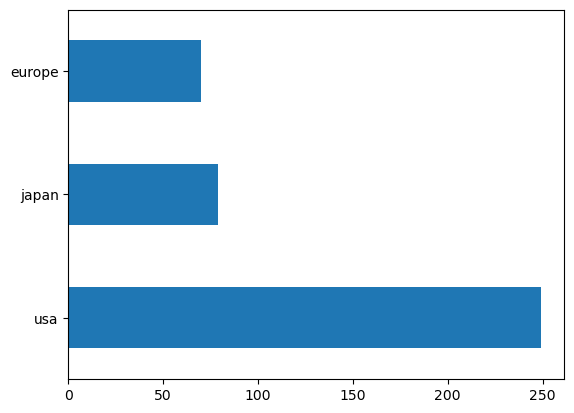

In [28]:
df['origin'].value_counts().plot(kind='barh');

#### User bar chart to show mpg info by origin and model year ←←←←←←←←← stopped here

In [29]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [30]:
table = df.groupby(['model_year', 'origin']).mean()['mpg'].unstack('origin')

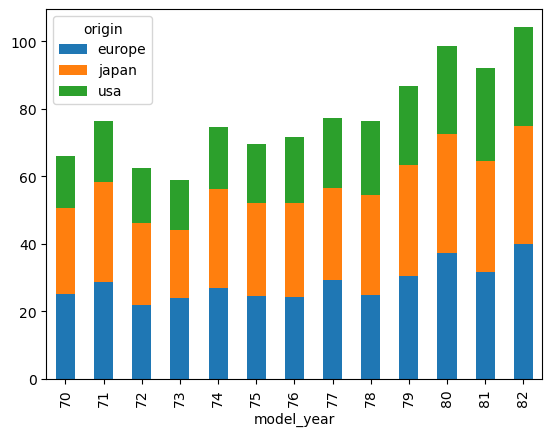

In [31]:
table.plot(kind='bar', stacked=True);

### Pie chart

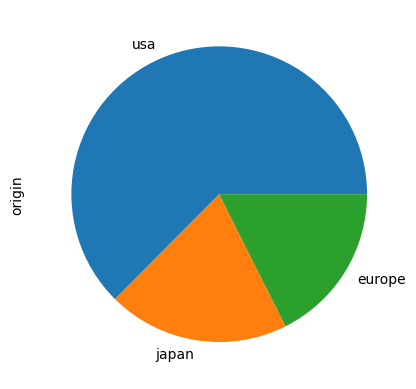

In [32]:
df['origin'].value_counts().plot(kind='pie');

<div class="alert alert-info">
<h4>Exercise</h4>

Create two plots with the Penguins dataset:
1) Bar plot showing the counts of species. 
    
2) Bar plot showing the mean values of body mass by species and by sex. 
    
    
<details><summary><i><u>(Solution)</u><i></summary><br>
<details><summary><i><u>(You can do it!)</u><i></summary><br>
    
```python
dfe['species'].value_counts().plot(kind='bar');
dfe.groupby(['species', 'sex']).mean().unstack('sex')['body_mass_g'].plot(kind='bar');
```
</details>
</details>
</div>

<div>
<h2 class="breadcrumb">Relationship between two variables</h2><p>
</div>

Relationship between weight and mpg:

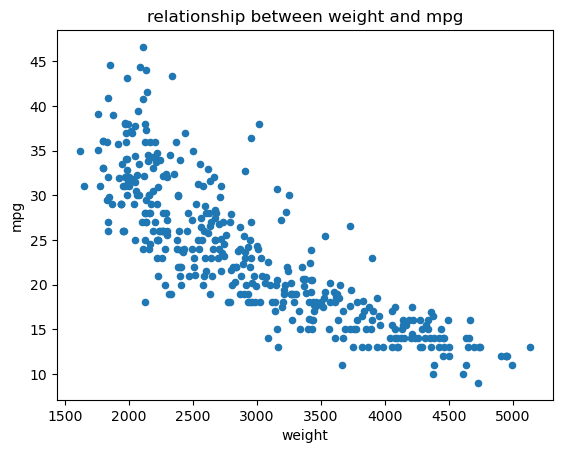

In [33]:
df.plot(x='weight', y='mpg', kind='scatter', title='relationship between weight and mpg');

Relationship between weight and mpg by origin:

There are often many ways to create the same plot. Here is one way to create this plot. We will see another way in the next notebook. 

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df[df.origin=='usa'].plot(x='weight', y='mpg', kind='scatter', ax=ax, c='r', label='USA');
df[df.origin=='japan'].plot(x='weight', y='mpg', kind='scatter', ax=ax, c='g', label='Japan');
df[df.origin=='europe'].plot(x='weight', y='mpg', kind='scatter', ax=ax, c='b', label='Europe');


<div class="alert alert-info">
<h4>Exercise</h4>

Create two plots with the Penguins dataset:
1) Scatter plot showing the relationship between flipper length and body mass. 
    
2) Showing this relationship by species.
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
    
<details><summary><i><u>(Give yourself one more minute)</u><i></summary><br>
    
```python
dfe.plot(x='flipper_length_mm', y='body_mass_g', kind='scatter');

fig, ax = plt.subplots()
dfe[dfe.species=='Adelie'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='r', label='Adelie');
dfe[dfe.species=='Gentoo'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='g', label='Gentoo');
dfe[dfe.species=='Chinstrap'].plot(x='flipper_length_mm', y='body_mass_g', kind='scatter', ax=ax, c='b', label='Chinstrap');

```
</details>
</details>
</div>

<div>
<h2 class="breadcrumb">Time series</h2><p>
</div>

In [ ]:
dft = pd.read_csv(
    'assets/air_quality_no2.csv', 
    index_col=0, 
    parse_dates=True
)

In [ ]:
dft.head()

In [ ]:
dft.plot();

In [ ]:
dft.plot(subplots=True, layout=(1,3), figsize=(15,4));

<div class="alert alert-info">
<h4>Exercise</h4>

Create an area chart for this time series data.
<details><summary><i><u>(Hint)</u><i></summary><br>
Try `kind="area"`
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dft.plot(figsize=(12, 4), kind='area');
dft.plot(figsize=(12, 4), kind='area', subplots=True);
```
</details>
</details>
</div>